In [186]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import qutip
import theano
import theano.tensor as T
import QubitNetwork
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [333]:
eta = 0.8182
xi = 0.0587
initial_ancilla = qutip.Qobj([
        [np.cos(eta)],
        [np.sin(eta) * np.exp(1j * xi)]
])

net = QubitNetwork.QubitNetwork(
    num_qubits=4,
    interactions=('all', ['xx', 'zz']),
    self_interactions=('all', ['x', 'z']),
    ancillas_state=initial_ancilla,
    system_qubits=[0, 1, 2]
)

factor  = -8.940 / 4 * net.tuple_to_xs_factor(((0, 1), 'zz')).copy()
factor += -4.957 / 4 * net.tuple_to_xs_factor(((0, 2), 'zz'))
factor += -4.957 / 4 * net.tuple_to_xs_factor(((1, 2), 'zz'))
factor += -5.657 / 4 * net.tuple_to_xs_factor(((0, 3), 'zz'))
factor += -5.657 / 4 * net.tuple_to_xs_factor(((1, 3), 'zz'))

factor += 15.060 / 4 * net.tuple_to_xs_factor(((2, 3), 'xx'))

factor += -2.428 / 2 * net.tuple_to_xs_factor((0, 'z'))
factor += -2.428 / 2 * net.tuple_to_xs_factor((1, 'z'))
factor += -4.957 / 2 * net.tuple_to_xs_factor((2, 'z'))
factor += -0.165 / 2 * net.tuple_to_xs_factor((3, 'z'))

factor += -19.08 / 2 * net.tuple_to_xs_factor((2, 'x'))
factor += -4.297 / 2 * net.tuple_to_xs_factor((3, 'x'))

foo = utils.bigreal2complex(factor)
foo = qutip.Qobj(foo, dims=[[2, 2, 2, 2], [2, 2, 2, 2]])
foo = foo.expm()
foo = foo.ptrace([0, 1, 2])
# qutip.tensor(psi, initial_ancilla)
foo

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = False
Qobj data =
[[  1.98052909e+00-0.15343455j  -2.97374742e-05-0.14470571j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j        ]
 [ -2.97374742e-05-0.14470571j   1.98065237e+00-0.04354642j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j        ]
 [  0.00000000e+00+0.j           0.00000000e+00+0.j
    6.69893185e-01+0.3994908j   -7.66672212e-01-0.26259121j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+00+0.j        ]
 [  0.00000000e+00+0.j           0.00000000e+00+0.j
   -7.66672212e-01-0.26259121j   9.55838048e-01+0.49737259j
    0.00000000e+00+0.j           0.00000000e+00+0.j           0.00000000e+00+0.j
    0.00000000e+0

In [385]:
eta = 0.8182
xi = 0.0587
initial_ancilla = qutip.Qobj([
        [np.cos(eta)],
        [np.sin(eta) * np.exp(1j * xi)]
])

net = QubitNetwork.QubitNetwork(
    num_qubits=4,
    interactions=('all', ['xx', 'zz', 'yy']),
    self_interactions=('all', ['x', 'z']),
    ancillas_state=initial_ancilla,
    system_qubits=[0, 1, 2],
    net_topology={
        ((0, 1), 'zz'): '1',
        ((0, 1), 'xx'): '2',
        ((1, 2), 'yy'): '3',
        (2, 'x'): '4'
    },
    J=[1., 1., 1., 1.]
)

psi0 = qutip.tensor([qutip.rand_ket(2) for _ in range(3)])
psi = qutip.tensor(psi0, initial_ancilla)

factor = net.tuple_to_xs_factor(((0, 1), 'zz')).copy()
factor += net.tuple_to_xs_factor(((0, 1), 'xx'))
factor += net.tuple_to_xs_factor(((1, 2), 'yy'))
factor += net.tuple_to_xs_factor((2, 'x'))
foo = utils.bigreal2complex(factor)
foo = qutip.Qobj(foo, dims=[[2, 2, 2, 2], [2, 2, 2, 2]])
foo_traced = foo.ptrace([0, 1, 2]) / 2


states, target_states = net.generate_training_data(foo_traced.expm(), 2)
cost = net.fidelity(states, target_states)
test = theano.function(inputs=[], outputs=cost)

test()

array(0.9999999999999998)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


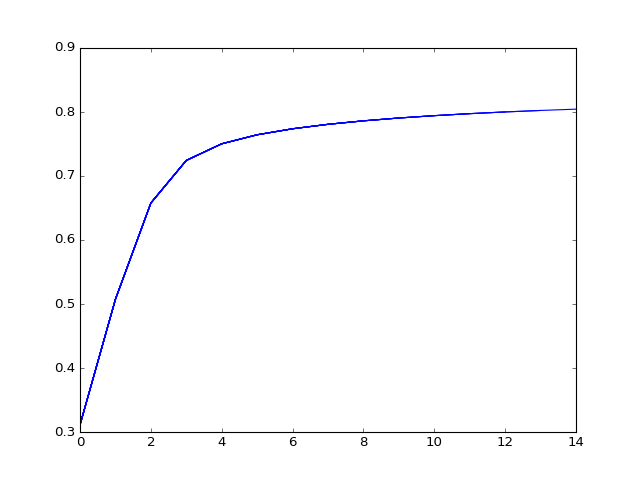

Epoch 0, 0.31105558919898296
Epoch 1, 0.5073396161695082
Epoch 2, 0.657739074833344
Epoch 3, 0.7243233196510483
Epoch 4, 0.7503244507035421
Epoch 5, 0.7644100047981914
Epoch 6, 0.7738086661120932
Epoch 7, 0.7807569633877206
Epoch 8, 0.7861985670424922
Epoch 9, 0.790617400810617
Epoch 10, 0.7942951923509907
Epoch 11, 0.7974112667073335
Epoch 12, 0.8000874873555377
Epoch 13, 0.8024108368078526
Epoch 14, 0.8044457725850558
Epoch 15, 

In [ ]:
# theano.config.optimizer = 'None'
net = QubitNetwork.QubitNetwork(
    num_qubits=4,
    interactions=('all', ['xx', 'yy', 'zz']),
    self_interactions=('all', ['x', 'y', 'z']),
    system_qubits=[0, 1, 2]
)
QubitNetwork.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=100,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=1
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


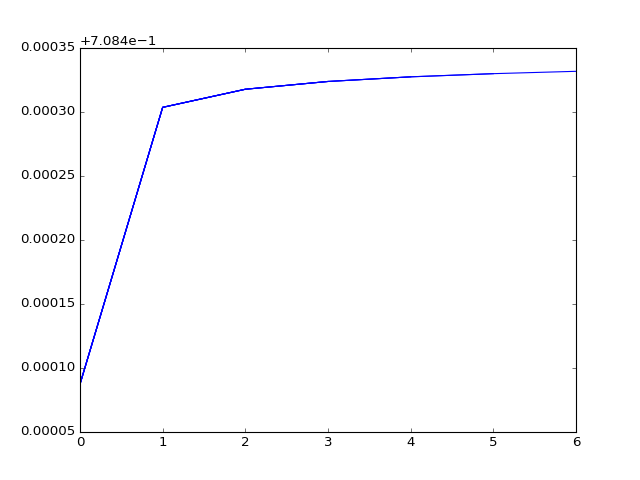

Epoch 0, 0.708487391588742
Epoch 1, 0.7087036354250149
Epoch 2, 0.7087177752756374
Epoch 3, 0.7087238565931855
Epoch 4, 0.7087274742520775
Epoch 5, 0.7087299500448193
Epoch 6, 0.7087317835727538
Epoch 7, 

KeyboardInterrupt: 

In [271]:
net = QubitNetwork.sgd_optimization(
    net=net,
    learning_rate=.1,
    n_epochs=20,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=10
)

In [266]:
net = QubitNetwork.load_network_from_file('nets/fredkin.pickle')
gate = qutip.Qobj(net.get_current_gate(), dims=[[2, 2, 2, 2], [2, 2, 2, 2]])
states, target_states = net.generate_training_data(qutip.fredkin(), 2)

fids = []
for state, target_state in zip(states, target_states):
    ket = qutip.Qobj(utils.bigreal2complex(state), dims=[[2, 2, 2, 2], [1, 1, 1, 1]])
    dm = (gate * ket).ptrace([0, 1, 2])
    target_dm = qutip.ket2dm(qutip.Qobj(utils.bigreal2complex(target_state), dims=[[2, 2, 2], [1, 1, 1]]))
#     display(target_dm)
    fid = (dm * target_dm).tr()
    fids.append(fid)
display(fids)
np.mean(fids)

[(0.9814301751699914-1.3010426069826053e-18j),
 (0.9787537289854081+6.505213034913027e-19j)]

(0.98009195207769984-3.2526065174565133e-19j)

In [267]:
test = theano.function([], net.fidelity(states, target_states))
test()

array(0.9800919520777001)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


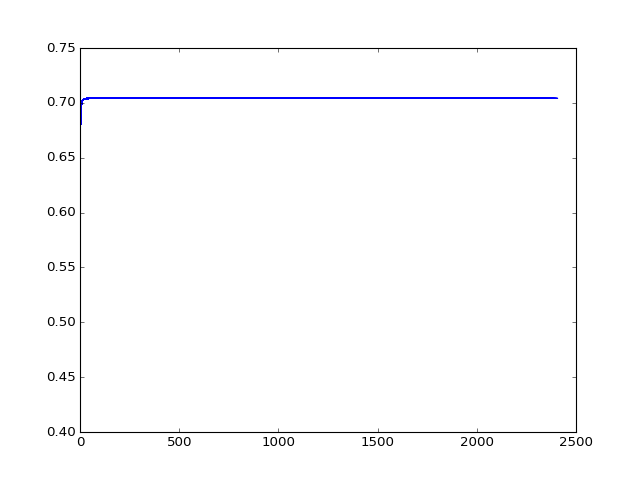

Epoch 0, 0.42141879666751825
Epoch 1, 0.420831346398288
Epoch 2, 0.6787633405923647
Epoch 3, 0.6880578706710064
Epoch 4, 0.6927446653301566
Epoch 5, 0.6956021046292515
Epoch 6, 0.6974867491269781
Epoch 7, 0.6988020907613066
Epoch 8, 0.6997614067057083
Epoch 9, 0.7004863344513543
Epoch 10, 0.701049949718743
Epoch 11, 0.7014981933961097
Epoch 12, 0.7018612200657691
Epoch 13, 0.702159621428032
Epoch 14, 0.7024079513424817
Epoch 15, 0.7026167971638383
Epoch 16, 0.7027940461336173
Epoch 17, 0.7029456905760423
Epoch 18, 0.7030763585999389
Epoch 19, 0.7031896750485425
Epoch 20, 0.7032885136491511
Epoch 21, 0.7033751771767397
Epoch 22, 0.703451528662529
Epoch 23, 0.7035190885193754
Epoch 24, 0.7035791074572892
Epoch 25, 0.7036326219030887
Epoch 26, 0.703680496585589
Epoch 27, 0.7037234575813003
Epoch 28, 0.7037621181867947
Epoch 29, 0.7037969993406177
Epoch 30, 0.7038285458648106
Epoch 31, 0.70385713947264
Epoch 32, 0.7038831092551305
Epoch 33, 0.7039067401877239
Epoch 34, 0.7039282800715397
E

KeyboardInterrupt: 

In [184]:
# theano.config.optimizer = 'None'
net = QubitNetwork.QubitNetwork(
    num_qubits=4,
    interactions=('all', ['xx', 'yy', 'zz']),
    self_interactions=('all', ['x', 'y', 'z']),
    system_qubits=[0, 1, 2]
)
QubitNetwork.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=100,
    batch_size=10,
    training_dataset_size=100,
    test_dataset_size=1000,
    target_gate=qutip.fredkin(),
    decay_rate=1
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


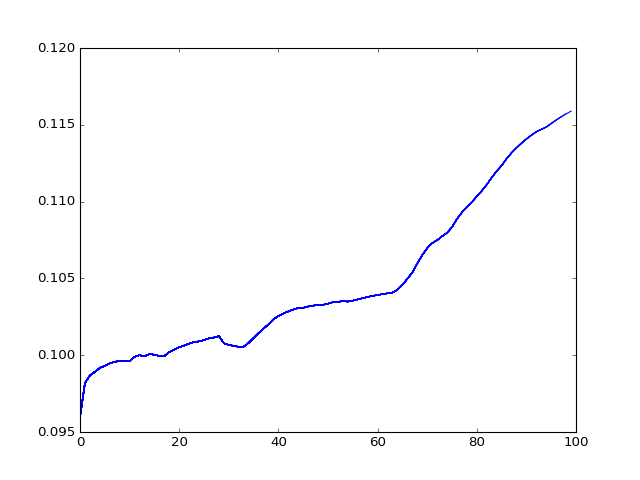

Epoch 0, 0.09595551109239836
Epoch 1, 0.09818872033376887
Epoch 2, 0.09868051786715994
Epoch 3, 0.09891637650687753
Epoch 4, 0.09917039793191064
Epoch 5, 0.09930922658624926
Epoch 6, 0.09946778872316726
Epoch 7, 0.09957940685742543
Epoch 8, 0.09960673430535513
Epoch 9, 0.09962302711326071
Epoch 10, 0.09960984018491441
Epoch 11, 0.09989430939720799
Epoch 12, 0.0999982223979674
Epoch 13, 0.09993470207134088
Epoch 14, 0.10007819284727318
Epoch 15, 0.1000310672960518
Epoch 16, 0.09994682322379847
Epoch 17, 0.0999421388038498
Epoch 18, 0.10020623897409825
Epoch 19, 0.10036875214819932
Epoch 20, 0.10051657516580412
Epoch 21, 0.10063043316998992
Epoch 22, 0.1007485173120147
Epoch 23, 0.10086017302254817
Epoch 24, 0.10089795988009084
Epoch 25, 0.10097846050144814
Epoch 26, 0.10110435645108737
Epoch 27, 0.10115098112412713
Epoch 28, 0.10124426904287936
Epoch 29, 0.1007838061421902
Epoch 30, 0.10066263881943216
Epoch 31, 0.10061237949510868
Epoch 32, 0.10054246530746572
Epoch 33, 0.1005564687423

In [159]:
# theano.config.optimizer = 'None'
net = QubitNetwork.QubitNetwork(
    num_qubits=4,
    interactions=('all', ['xx', 'yy', 'zz']),
    self_interactions=('all', ['x', 'y', 'z']),
    system_qubits=[0, 1, 2]
)
QubitNetwork.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=100,
    batch_size=10,
    training_dataset_size=200,
    test_dataset_size=1000,
    target_gate=qutip.fredkin()
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


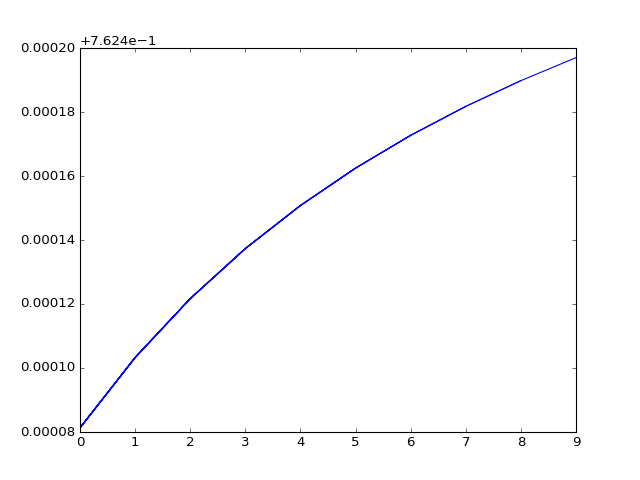

Epoch 0, 0.7624813055326499
Epoch 1, 0.7625032759403576
Epoch 2, 0.7625216843247995
Epoch 3, 0.7625373281942959
Epoch 4, 0.7625507818024891
Epoch 5, 0.7625624696113835
Epoch 6, 0.762572712417425
Epoch 7, 0.7625817573511445
Epoch 8, 0.7625897979858981
Epoch 9, 0.762596988173803
Finished training


In [181]:
net = QubitNetwork.sgd_optimization(
    net=net,
    learning_rate=.0002,
    n_epochs=10,
    batch_size=2,
    training_dataset_size=100,
    test_dataset_size=1000,
    target_gate=qutip.fredkin()
)

In [65]:
net.J.get_value()
U = np.concatenate((net.hs_factors, net.Js_factors), axis=0)
U = np.tensordot(net.J.get_value(), U, axes=1)
U = scipy.linalg.expm(U)
U = utils.bigreal2complex(U)
# U[np.abs(U) < 1e-2] = 0
qutip.Qobj(U)
# qutip.Qobj(U, dims=[[2, 2, 2, 2], [2, 2, 2, 2]]).ptrace([0, 1, 2])

Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = False
Qobj data =
[[  9.46251942e-01 -2.96999796e-01j   8.92913422e-04 +4.66530943e-04j
    2.11716435e-03 -1.38326524e-04j   1.66093236e-02 +1.10597560e-03j
   -3.86329057e-04 +2.34599902e-04j  -4.34983804e-02 -3.36841415e-02j
   -9.16565915e-03 -2.73620082e-02j  -2.54654531e-05 -7.83479485e-04j
    4.82571985e-04 -5.73872508e-05j  -4.83867791e-02 +3.30530011e-02j
   -1.49359240e-02 -1.48079479e-02j  -2.84388219e-05 -5.31628578e-04j
    2.02846303e-02 -1.25621936e-02j  -2.17196968e-04 -1.80237687e-04j
   -1.89632737e-04 -3.91387419e-04j  -5.29787212e-02 +7.07289919e-02j]
 [ -4.32651311e-04 +9.36146530e-04j   8.81406289e-01 -3.44943499e-01j
    1.33414498e-02 -1.56057239e-02j   3.16551478e-04 +3.65780655e-04j
    9.53941682e-03 +1.27478497e-02j  -8.72757821e-04 -4.43719917e-04j
    9.47607174e-04 +2.90883827e-04j   4.79766784e-02 -1.69017057e-01j
   -1.40714061e-02 -1.62810988e-02j   2.55196523e-04 -1.93819723

In [170]:
gate = qutip.Qobj(net.get_current_gate())
gate.dims = [[2, 2, 2, 2], [2, 2, 2, 2]]

in_ket = qutip.rand_ket(8)
in_ket.dims = [[2, 2, 2], [1, 1, 1]]
target_ket = qutip.fredkin() * in_ket
target_dm = qutip.ket2dm(target_ket)

in_full_ket = qutip.tensor(in_ket, net.ancillas_state)
out_full_ket = gate * in_full_ket
out_dm = out_full_ket.ptrace([0, 1, 2])

(target_dm * out_dm).tr()

# gate = qutip.tensor(qutip.rand_dm(4), qutip.rand_dm(2))
# display(gate)
# gate = gate.data.toarray()
# gate[2, 0] / gate[0, 0], gate[2, 1] / gate[0, 1], gate[3, 0] / gate[1, 0], gate[3, 1] / gate[1, 1]

(0.14043031995733307+3.469446951953614e-18j)

In [156]:
net = QubitNetwork.load_network_from_file('nets/fredkin.pickle')
states, target_states = net.generate_training_data(qutip.fredkin(), 2)
compute_rhos = theano.function([], net.fidelity(states, target_states))

rhos = compute_rhos()
for idx in range(len(states)):
    rho = qutip.Qobj(utils.bigreal2complex(rhos[idx]))
    dm = qutip.ket2dm(qutip.Qobj(utils.bigreal2complex(target_states[idx])))

    print(rho == dm)

True
True
